#  TensorFlow 101 & Word2Vec 

<center>Shan-Hung Wu & DataLab<br/>Fall 2017</center>

TensorFlow is a powerful open source libraray used for large-scale machine learning.  
In this lab, we will first go through some basic concepts of TensorFlow. We will then look at the word2vec model and the `Dataset` API.

# Environment Setup 

## Installing CUDA and CuDNN
In order to use NVIDIA GPUs to train your model, CUDA and CuDNN are required.
The installation guide can be found [here](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/tensorflow/).

## Installing TensorFlow
There are several ways to install TensorFlow which can be found [here](https://www.tensorflow.org/install/). One way is to install TensorFlow in a conda virtual environment. First, we create a new environment called `tensorflow`.  
```
> conda create -n tensorflow
```
Then we activate the environment:
```
> source activate tensorflow (Linux or Mac)
> activate tensorflow (Windows)
```

According to the TensorFlow official webpage, it is recommended installing TensorFlow with `pip install` command instead of `conda install`. Since the conda package is community supported, not officially supported, we will stick to `pip install`.  

First, make sure that `pip3` is installed:
```
> pip3 -V
```
Install TensorFlow with `pip install`:
```
> pip3 install tensorflow-gpu # Python 3.n; GPU support 
```
Then we can verify the installation by entering a short program in the python interactive shell.
```
> python
```
Type in the following program:
```
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))
```

#  Getting Started with TensorFlow 

Originally developed by Google Brain, TensorFlow is an open source library which provides a variety of functions and classes used to conduct machine learning.

The benefits of using TensorFlow include:
- Python API
- Portability: can be used on multiple CPUs or GPUs as well as on mobile devices
- Flexibility: can run on different devices e.g. Raspberry Pi, Android, iOS, Windows, Linux
- Visualization: visualize the training process via TensorBoard
- Checkpoints: manage trained models
- Auto-differentiation
- Large community 

# Graphs and Sessions

In TensorFlow, the definition of computations is separated from their execution. First, we specify the operations by building a data flow graph in Python. Next, TensorFlow runs the graph with a `Session` using optimized C++ code. Let's import tensorflow first and create a session.

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

### Tensors

A **Tensor** is an array of any dimension. The **rank** of a tensor refers to the number of dimensions it has.

A rank 0 tensor with shape [ ]:
```
> 3
```

A vector - a rank 1 tensor with shape [3]:
```
[1.0, 2.0, 3.0]
```

A matrix - a rank 2 tensor with shape [2, 3]
```
[[1.0, 2.0, 3.0], 
 [4.0, 5.0, 6.0]]
```

A rank 3 tensor with shape [2,1,3]
```
[[[1.0, 2.0, 3.0]], 
 [[7.0, 8.0, 9.0]]]
```

### Constants
We can create constants by passing lists or constants into the `tf.constant` function.
```
tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
```


In [2]:
# constant of 1d tensor (vector)
a = tf.constant([2, 2], dtype=tf.int32, name="vector")
a.eval()

array([2, 2], dtype=int32)

In [3]:
# constant of 2x2 tensor (matrix)
b = tf.constant([[0, 1], [2, 3]], name="b")
b.eval()

array([[0, 1],
       [2, 3]], dtype=int32)

We can also create tensors of a specific value.

In [4]:
c = tf.zeros([2, 3], tf.int32) # [[0, 0, 0], [0, 0, 0]]
c.eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [5]:
d = tf.ones([2, 3], tf.int32) #  [[1, 1, 1], [1, 1, 1]]
d.eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [6]:
# create a tensor containing zeros, with shape and type as input_tensor
input_tensor = tf.constant([[1,1], [2,2], [3,3]], dtype=tf.float32)
e = tf.zeros_like(input_tensor)  #  [[0, 0], [0, 0], [0, 0]]
e.eval()

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [7]:
f = tf.ones_like(input_tensor) # [[1, 1], [1, 1], [1, 1]]
f.eval()

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]], dtype=float32)

### Variables

Unlike a constant, a variable can be assigned to, so its value can be changed. Also, a constant's value is stored on the graph, whereas a variable's value is stored seperately. To declare a variable, we create a instance of `tf.Variable`.


In [8]:
 #create variable a with scalar value
a = tf.Variable(2, name="scalar")
#create variable b as a vector
b = tf.Variable([2, 3], name="vector")
#create variable c as a 2x2 matrix
c = tf.Variable([[0, 1], [2, 3]], name="matrix")
# create variable W as 784 x 10 tensor, filled with zeros
W = tf.Variable(tf.zeros([784,10]))

To assign value to variables, we can use `tf.Variable.assign()`. It creates a operation that assigns the variable with the specified value. Also, it is important to remember that a variable needs to be **initialized** before used. To initialize variables, run `tf.global_variables_initializer()`.

In [9]:
# assign a * 2 to a and call that op a_times_two
a = tf.Variable(2, name="scalar")
a_times_two = a.assign(a*2) # an operation that assigns value a*2 to a

init = tf.global_variables_initializer() # an operation that initializes all variables
sess.run(init) # run the init operation with session
sess.run(a_times_two)

4

In [10]:
# If a variable is used before initialized, an error will occur
a = tf.Variable(2, name="scalar")
a.eval() # a is NOT initialized

FailedPreconditionError: Attempting to use uninitialized value scalar_2
	 [[Node: _retval_scalar_2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/cpu:0"](scalar_2)]]

### Building a data flow graph

A data flow graph consists of nodes, each representing an operation. Each node takes zero or more tensors as inputs and produces a tensor as an output. A TensorFlow constant is a type of node which takes no inputs and outputs the value it stores. We create two floating point tensors and add them with an `add` operation (which is also a node).

In [11]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2) 

print(node1) 
print(node2)
print(node3)

Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Const_2:0", shape=(), dtype=float32)
Tensor("Add:0", shape=(), dtype=float32)


Note that printing the node would not output the values `3.0` and `4.0`. Instead, `node1` and `node2` output `3.0` and `4.0` when they are evaluated. 

### Visualizing and running a graph
After building a graph, we can visualize our graph using TensorBoard. To do this, we create a directory `graph` to store the event data.

In [12]:
# create a directory to store our graph
import os

logs_dir = './graph'
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

To evaluate a graph, a `Session` is used. A TensorFlow session places operations onto devices such as CPUs and GPUs and runs them, and computes variable values. 

In [13]:
sess = tf.Session()
print(sess.run([node1, node2]))
print(sess.run(node3))
sess.close() # close the session

[3.0, 4.0]
7.0


Alternatively, we can create and run a session with the following code:

In [14]:
with tf.Session() as sess:
  # write operations to the event file
  writer = tf.summary.FileWriter(logs_dir, sess.graph) 
  print(sess.run([node1, node2]))
  print(sess.run(node3))
  # no need to write sess.close()
  
writer.close() 

[3.0, 4.0]
7.0


To visualize the graph, go to the directory where we ran our jupyter notebook and start tensorboard.
```
> cd path/to/your/notebook
> tensorboard --logdir="graphs/"
```
Open your browser and go to http://localhost:6006/, in the tab graph and you will see something like this:
<img src="files/graph.jpeg" width="350">

###  Placeholders and feed_dict
Creating a graph of constants as the above is not particularly useful. A graph can be defined to accept external inputs without knowing the actual values needed for computation. A `placeholder` is used as a promise to provide a value later. Then, values are fed into the placeholder by providing a dictionary containing concrete values as argument for `feed_dict`.

In [15]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)
with tf.Session() as sess:
# feed [1, 2, 3] to placeholder a via the dict {a: [1, 2, 3]}
# fetch value of c
    print(sess.run(c, feed_dict={a: [1, 2, 3]}))

[ 6.  7.  8.]


If we did not feed values into the placeholder, an error will occur.

In [16]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)
#If we try to fetch c, we will run into error.
with tf.Session() as sess:
    print(sess.run(c))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [3]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: add_1/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_8_add_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "/home/mrplayer/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mrplayer/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-4b14b26bf447>", line 2, in <module>
    a = tf.placeholder(tf.float32, shape=[3])
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/mrplayer/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [3]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: add_1/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_8_add_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Sharing Variables

To share variables, we can explicitly pass `tf.Variable` objects or implicitly wrapping `tf.Variable` objects with `tf.variable_scope` objects. Variable scopes not only allow us to share variables, they also make naming variables easier. Suppose we have multi-layered model, instead of coming up with different names for variables in different layers. We can use different scopes to distinguish them. We can use `tf.get_variable` to get an existing variable, if the variable does not exist, a new one is created and returned.

In [17]:
with tf.variable_scope("foo"):
    v = tf.get_variable("v", [1])  # v.name == "foo/v:0"
    w = tf.get_variable("w", [1])  # w.name == "foo/w:0"
with tf.variable_scope("foo", reuse=True):
    v1 = tf.get_variable("v")  # The same as v above.

In [18]:
# clear used variables in jupyter notebook
%reset -fs 

#  Word2Vec
Word2Vec is a computationally-efficient model that learns to embed words into vectors. The goal is to map words that have similar meanings close to each other.

## Why represent words as vectors?
When dealing with words, a straightforward way would be treating each word as discrete symbols. For instance, `cat` as `2` and `dog` as `1`. However, these symbols carry no information about the original word, making it impossible for us to infer the relationship between cats and dogs (both are four-legged animals and both are pets) based on the symbols alone. Hence, to successfully learn the relationship between them, we might need a large amount of training data.  

On the other hand, **Vector space models (VSMs)** which represent words as vectors can help overcome these obstacles. This is based on a key observation that **semantically similar words are often used interchangeably in different contexts**. For example, the words `cat` and `dog` may both appear in a context "\_\_\_ is my favorate pet." When feeding `cat` and `dog` into the NN to predict their nearby words, these two words will be likely to share the same/similar hidden representation in order to predict the same/similar nearby words. 

## Skip-Gram and CBOW
Word2Vec comes in two variants **Skip-Gram** and **CBOW (Continuous Bag-Of-Words)**. Algorithmically, these models are similar. CBOW predicts the target words using its neighborhood(context) whereas Skip-Gram does the inverse, which is to predict context words from the target words. For example, given the sentence `the quick brown fox jumped over the lazy dog`. Defining the context words as the word to the left and right of the target word, CBOW will be trained on the dataset: 

`([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox)...`  

where CBOW tries to predict the target word `quick` from the context words in brackets `[the, brown]`, and predict `brown` from `[quick, fox]` and so on.
However, with Skip-Gram, the dataset becomes  

`(quick, the), (quick, brown), (brown, quick), (brown, fox), ...`  

where Skip-Gram predicts the context word `the`, `brown` with the target word `quick`. Statistically, CBOW smoothes over a lot of the distributional information (by treating an entire context as one example). For the most part, this turns out to be a useful thing for smaller datasets. On the other hand, Skip-Gram treats each context-target pair as a new observation and is shown to be able to capture the semantics better when we have a large dataset.

| <img src="files/Skip-gram.png" width="350"> | <img src="files/Cbow.png" width="350"> |
|:---------------------------------------------:|:---------------------------------------------:|
|                       CBOW                    |                       Skip-gram               |

Note that the tasks described above are only used to train the neural network, we don’t use the neural network for the task we trained it on. What we want is the weights of the hidden layer, the "embedding matrix".  

For the rest of the tutorial, we will focus on the Skip-Gram model.

## Cost Function
Like most neural networks, a Skip-Gram model is trained using the maximum likelihood(ML) principle:  
$$  \arg\min_{\Theta}\sum_{i=1}^{N}{-\log\mathrm{P}(\boldsymbol{y}^{(i)}\,|\,\boldsymbol{x}^{(i)},\Theta)} $$
In a multiclass task where $y=1,\cdots,V$($V$ being the vocabulary size) we usually assume

$$\Pr(y\,|\,\boldsymbol{x})\sim\mathrm{Categorical}(y\,|\,\boldsymbol{x};\boldsymbol{\rho})=\prod_{i=1}^{V}\rho_{i}^{1(y;\,y=i)}.$$

It is natural to use $V$ **Softmax units** in the output layer. That is, the activation  $a_i^{(L)}$ of each unit at the last layer(layer $L$) $z_i^{(L)}$ outputs one dimension of the softmax function, a generalization of the logistic sigmoid:


$$a_i^{(L)}=\rho_i=\mathrm{softmax}(\boldsymbol{z}^{(L)})_{i}=\frac{\exp(z_{i}^{(L)})}{\sum_{j=1}^{{\color{red}V}}\exp(z_{j}^{(L)})}.$$

The cost function then becomes:

$$\arg\min_{\Theta}\sum_{i}-\log\prod_{j}\left(\frac{\exp(z_{j}^{(L)})}{\sum_{k=1}^{{\color{red}V}}\exp(z_{k}^{(L)})}\right)^{1(y^{(i)};y^{(i)}=j)}=\arg\min_{\Theta}\sum_{i}-z_{y^{(i)}}^{(L)}+\log\sum_{k=1}^{{\color{red}V}}\exp(z_{k}^{(L)})$$

Basically, we want to maximize $\rho_j$ when seeing an example of class $j$. However, this objective introduces high training cost when $V$ is large. Recall from the lecture that, at every training step in SGD, we need to compute the gradient of the cost function with respect to $\boldsymbol{z}^{(L)}$. This gradient involves the $z_{i}^{(L)}$ of **every unit** at the output layer, which in turn leads to a lot of weight updates in $\boldsymbol{W}^{(1)}$ and $\boldsymbol{W}^{(2)}$ at every training step. The training will be very slow. Next, we will introduce two ways to speed up the training process.
### Sampled Softmax
Suppose that we have a training sequence of $T$ training words $w_1,w_2,w_3,⋯,w_T$ that belong to a vocabulary $V$ whose size is $|V|$ and that our model uses context $c$ of size $n$. Assuming that each word input embedding $v_w$ (the "id"s each word is mapped to) of dimension $d$ and output embedding $v_{w}^{'}$ (the embedding generated by softmax output)


Recall that the loss function is as follows:  
$$C(\theta) = -z_{y^{(i)}}^{(L)} + log \sum_{k=1}^{V} exp(z_{k}^{(L)})$$

Computing the gradient $\nabla$ of $C(\theta)$ with respect to the model's parameters $\theta$,

$$ \nabla_{\theta}C(\theta) = \nabla_{\theta} (\,-z_{y^{(i)}}^{(L)}\,) + \nabla_{\theta} log \sum_{k=1}^{V} exp(z_k^{(L)})  $$  

Since the gradient of $logx$ is $\frac{1}{x}$, the previous equation can be written as

$$ \nabla_{\theta}C(\theta) = \nabla_{\theta} (\,-z_{y^{(i)}}^{(L)}\,) + \frac{1}{\sum_{k=1}^{V} exp(z_k^{(L)})} \nabla_{\theta} \sum_{j=1}^{V} exp(z_j^{(L)}) $$  

Next, move the gradient into the sum

$$ \nabla_{\theta}C(\theta) = \nabla_{\theta} (\,-z_{y^{(i)}}^{(L)}\,) + \frac{1}{\sum_{k=1}^{V} exp(z_k^{(L)})} \sum_{j=1}^{V} \nabla_{\theta} exp(z_j^{(L)}) $$  

Since the gradient of the exponential function exp(x) is exp(x) itself and applying chain rule once more, the formula becomes

$$  \nabla_{\theta}C(\theta) = \nabla_{\theta} (\,-z_{y^{(i)}}^{(L)}\,) + \frac{1}{\sum_{k=1}^{V} exp(z_k^{(L)})} \sum_{j=1}^{V} exp(z_j^{(L)}) \nabla_{\theta}(z_{j}^{(L)})  $$ 

Moving the $\sum$ to the front, we have

$$ \nabla_{\theta}C(\theta) = - \left[  \nabla_{\theta} (\,z_{y^{(i)}}^{(L)}\,) + \sum_{j=1}^{V}  \frac{exp(z_j^{(L)})} {\sum_{k=1}^{V} exp(z_k^{(L)})} \nabla_{\theta}(-z_{j}^{(L)})\right]$$


Note that $\frac{exp(\,z_j^{(L)}\,)} {\sum_{k=1}^{V} \, exp(\,z_k^{(L)}\,)}$  is the softmax probability $ P(z_{j}^{(L)}) $ of $z_{j}^{(L)}$.

Replacing it and moving the negative sign to the front, we get

$$ \nabla_{\theta}C(\theta) = - \left[ \nabla_{\theta} (\,z_{y^{(i)}}^{(L)}\,) +  \sum_{j=1}^{V} P(z_j^{(L)}) \nabla_{\theta} (-z_j^{(L)}) \right] $$

where the first term is related to the target word, and the second term is related to all the other words in the vocabulary. Moreover, the second term is an expectation of $\nabla_{\theta} (-z_j^{(L)}))$ for all words in $V$. Rewritting the formula, we get

$$ \sum_{j=1}^{V} P(z_j^{(L)}) \nabla_{\theta} (-z_j^{(L)}) = \mathop{\mathbb{E}}_{z_j \sim P} [ \nabla_{\theta}(-z_{j}^{(L)}) ] $$ 

and 

$$  \nabla_{\theta}C(\theta) = - \left[  \nabla(\,z_{y^{(i)}}^{(L)}\,) + \mathop{\mathbb{E}}_{z_j \sim P} [ \nabla_{\theta}(-z_{j}^{(L)}) ]   \right]$$ 

Since we don't want to look at the whole vocabulary each time we compute the second term, we sample a small subset $V'$ from the whole vocabulary $V$ according to a predifined noise distribution $Q$, then the second term can be approximated as

$$ \mathop{\mathbb{E}}_{z_j \sim P} [ \nabla_{\theta}(-z_{j}^{(L)}) ] \approx \sum_{\boldsymbol {x}_i \in {\color{red}V^{\color{red}'}}} \frac{exp(z_{j}^{(L)})-log(Q(\boldsymbol {x}_i))}{ \sum_{\boldsymbol {x}_k \in {\color{red}V^{\color{red}'}}} exp(z_{j}^{(L)})-log(Q(\boldsymbol {x}_k))}$$ 

where $Q$ is taken as 

$$ Q(\mathbf {x}_i) = \begin{equation}
\left\{
\begin{array}{rl}
\frac{1}{|V_{i}^{'}|} \; if \; \boldsymbol {x}_i \in V_{i}^{'}\\
0, otherwise
\end{array}
\right.
\end{equation} $$



### Noise Contrastive Estimation (NCE)
Instead of estimating the probability of word $\Pr(y\,|\,\boldsymbol{x})$, we reduce the problem into a **binary classification** task, where the model tries to distinguish the target word $w_t$ from $k$ noise words $\tilde{w_{ik}}$. An illustration for CBOW is shown below. For skip-gram the direction is simply inverted.
<img src="files/nce-nplm.png" width="350">

Using $\boldsymbol{x}_j$ to denote the correct word given context $c_j$, and $\tilde{\boldsymbol{x}_{ij}}$ to denote the noise words. Our cost function using maximum likelihood principle look like:

$$ C(\theta) = - \sum_{i=1}^{V} \left[ logP(y=1\; | \;\boldsymbol{x}_i,c_i) + k\mathop{\mathbb{E}}_{\tilde{\boldsymbol{x}_{ik}} \sim Q} [ logP(y=0\; | \;\tilde{\boldsymbol{x}_{ik},c_i}) ] \right]$$

Since calculating the expectation of the noise words still require summing over the whole vocabulary, we estimate $ \mathop{\mathbb{E}}_{\tilde{\boldsymbol{x}_{jk}} \sim Q} [ logP(y^{(i)}=0\; | \;\tilde{\boldsymbol{x}_{jk},c_j}) ] $ by taking the mean over $k$ 

$$ C(\theta) = - \sum_{i=1}^{V} \left[ logP(y=1\; | \;\boldsymbol{x}_i,c_i) + k \sum_{j=1}^{k} \frac{1}{k} logP(y=0\; | \;\tilde{\boldsymbol{x}_{jk},c_j})  \right]$$

Eliminating $k$ and $\frac{1}{k}$

$$ C(\theta) = - \sum_{i=1}^{V} \left[ logP(y=1\; | \;\boldsymbol{x}_i,c_i) +  \sum_{j=1}^{k}  logP(y=0\; | \;\tilde{\boldsymbol{x}_{jk},c_j})  \right]$$

Since we are sampling from two distributions, the correct word is sampled from the true distribution $P$ according to the context $c$ and noise words are sampled from $Q$, the probability of sampling either a positive sample or a negative sample can be written as

$$ P(y \; | \; \boldsymbol{x}_i, c_i) = \frac{1}{k+1}P(\boldsymbol{x}\;|\;c) + \frac{k}{k+1} Q(\boldsymbol{x}) $$

Hence

$$ P(y=1\;|\; \boldsymbol{x}_i, c_i) = \frac{\frac{1}{k+1}P(\boldsymbol{x}\;|\;c)}{\frac{1}{k+1}P(\boldsymbol{x}\;|\;c) + \frac{k}{k+1} Q(\boldsymbol{x})} = \frac{P(\boldsymbol{x}\;|\;c)}{P(\boldsymbol{x}\;|\;c) + kQ(\boldsymbol{x})}$$

and

$$ P(y=0\;|\; \boldsymbol{x}_i, c_i) = 1 - P(y=1\;|\; \boldsymbol{x}_i, c_i)$$

Note that calculating $P(\boldsymbol{x}\;|\;c)$ requires summing over the whole vocabulary since

$$P(\boldsymbol{x}\;|\;c) = \frac{exp(z_{i}^{(L)})}{\sum_{k=1}^{V} exp(z_{k}^{(L)})}$$

If we represent $\sum_{k=1}^{V} exp(z_{k}^{(L)})$ as $Z(c)$, we have

$$P(\boldsymbol{x}\;|\;c) = \frac{z_{i}^{(L)}}{Z(c)}$$

The interesting thing is that in NCE, $Z(c)$ is treated as a hyperparameter, which can be set at 1 without affecting the model's performance. Letting $Z(c) = 1$, we have

$$P(\boldsymbol{x}\;|\;c) = exp(z_{i}^{(L)})$$

$$ P(y=1\;|\; \boldsymbol{x}_i, c_i) = \frac{ exp(\,z_{i}^{(L)}\,) }{ exp(\,z_{i}^{(L)}\,) + kQ(\boldsymbol{x}) }$$


and the loss function is obtained

$$ C(\theta) = - \sum_{i=1}^{V} [log\frac{ exp(\,z_{i}^{(L)}\,) }{ exp(\,z_{i}^{(L)}\,) + kQ(\boldsymbol{x})} + logP(1 - \frac{ exp(\,z_{i}^{(L)}\,) }{ exp(\,z_{i}^{(L)}\,) + kQ(\boldsymbol{x})} ] $$ 

It can be shown that as we increase the number of noise samples $k$, the NCE derivative tends towards the gradient of the softmax function.

Intuitively, the distinction between sampled softmax and noise contrastive estimation is that sampled softmax is more about sampling from the given distribution in order to approximate the true softmax. On the other hand, noise contrastive estimation is more about selecting noise samples to mimic the true softmax. It only takes 1 true class and $k$ noise classes. 

## The Dataset
The dataset we use is text8, which is the first 100 MB of cleaned text of the English Wikipedia dump on Mar. 3, 2006. While 100MB is not enough to train really good embeddings, we can still see some interesting relations. Splitting the text by blank space, we can find that there are 17,005,207 tokens in total.

### Preparing training data
To generate batches for training, several functions defined below are used. First, we read the data into the memory and build the vocabulary using a number of most commonly seen words. Meanwhile, we build keep two dictionaries, a dictionary that translates words to indices and another which does the reverse. Then, for every word in the text selected as the center word, pair them with one of the context words. Finally, a python generator which generates a batch of pairs of center-target pairs.

In [19]:
"""The content of process_data.py"""

from collections import Counter
import random
import os
import sys
sys.path.append('..')
import zipfile

import numpy as np
from six.moves import urllib
import tensorflow as tf


# Parameters for downloading data
DOWNLOAD_URL = 'http://mattmahoney.net/dc/'
EXPECTED_BYTES = 31344016
DATA_FOLDER = 'data/'
FILE_NAME = 'text8.zip'


def make_dir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
    	pass

def download(file_name, expected_bytes):
    """ Download the dataset text8 if it's not already downloaded """
    file_path = DATA_FOLDER + file_name
    if os.path.exists(file_path):
        print("Dataset ready")
        return file_path
    file_name, _ = urllib.request.urlretrieve(DOWNLOAD_URL + file_name, file_path)
    file_stat = os.stat(file_path)
    if file_stat.st_size == expected_bytes:
        print('Successfully downloaded the file', file_name)
    else:
        raise Exception(
              'File ' + file_name +
              ' might be corrupted. You should try downloading it with a browser.')
    return file_path    
    
    
def read_data(file_path):
    """ Read data into a list of tokens"""
    with zipfile.ZipFile(file_path) as f:
        words = tf.compat.as_str(f.read(f.namelist()[0])).split()
        # tf.compat.as_str() converts the input into the string
    return words

def build_vocab(words, vocab_size):
    """ Build vocabulary of VOCAB_SIZE most frequent words """
    dictionary = dict()
    count = [('UNK', -1)]
    count.extend(Counter(words).most_common(vocab_size - 1))
    index = 0
    make_dir('processed')
    with open('processed/vocab_1000.tsv', "w") as f:
        for word, _ in count:
            dictionary[word] = index
            if index < 1000:
                f.write(word + "\n")
            index += 1
    index_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, index_dictionary

def convert_words_to_index(words, dictionary):
    """ Replace each word in the dataset with its index in the dictionary """
    return [dictionary[word] if word in dictionary else 0 for word in words]

def generate_sample(index_words, context_window_size):
    """ Form training pairs according to the skip-gram model. """
    for index, center in enumerate(index_words):
        context = random.randint(1, context_window_size)
        # get a random target before the center word
        for target in index_words[max(0, index - context): index]:
            yield center, target
        # get a random target after the center wrod
        for target in index_words[index + 1: index + context + 1]:
            yield center, target

def get_batch(iterator, batch_size):
    """ Group a numerical stream into batches and yield them as Numpy arrays. """
    while True:
        center_batch = np.zeros(batch_size, dtype=np.int32)
        target_batch = np.zeros([batch_size, 1])
        for index in range(batch_size):
            center_batch[index], target_batch[index] = next(iterator)
        yield center_batch, target_batch
        
def get_batch_gen(index_words, context_window_size, batch_size):
    """ Return a python generator that generates batches"""
    single_gen = generate_sample(index_words, context_window_size)
    batch_gen = get_batch(single_gen, batch_size)
    return batch_gen
        
def process_data(vocab_size):
    """ Read data, build vocabulary and dictionary"""
    file_path = download(FILE_NAME, EXPECTED_BYTES)
    words = read_data(file_path)
    dictionary, index_dictionary = build_vocab(words, vocab_size)
    index_words = convert_words_to_index(words, dictionary)
    del words # to save memory
    return index_words, dictionary, index_dictionary

Let's check if the batch generated is correct in shape.

In [20]:
vocab_size = 10000
window_sz = 5
batch_sz = 64
index_words, dictionary, index_dictionary = process_data(vocab_size)
batch_gen = get_batch_gen(index_words, window_sz, batch_sz)
X, y = next(batch_gen)

print(X.shape)
print(y.shape)

Dataset ready
(64,)
(64, 1)


We can print out the first 10 pairs of `X` and `y`.

In [21]:
for i in range(10): # print out the pairs
  data = index_dictionary[X[i]]
  label = index_dictionary[y[i,0]]
  print('(', data, label,')')

( anarchism originated )
( originated anarchism )
( originated as )
( originated a )
( as originated )
( as a )
( a as )
( a term )
( term originated )
( term as )


In [22]:
for i in range(10): # print out the first 10 words in the text
  print(index_dictionary[index_words[i]], end=' ')

anarchism originated as a term of abuse first used against 

We can check that `(center, target)` pairs are indeed correct.

### Using the **Dataset** API

The relatively new Dataset API in TensorFlow allows one to build complex input pipelines without handling queues and faster than `feed_dict`. We can construct, apply transformations and extract elements from the dataset.

In [23]:
BATCH_SIZE = 128
dataset = tf.contrib.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.repeat()  # Repeat the input indefinitely.
dataset = dataset.batch(BATCH_SIZE) # stack BATCH_SIZE elements into one
iterator = dataset.make_one_shot_iterator() # iterator
next_batch = iterator.get_next() # an operation that gives the next batch

In [24]:
with tf.Session() as sess:
  data, label = sess.run(next_batch)
  print(data.shape)
  print(label.shape)

(128,)
(128, 1)


## Building the model
We will now focus on building the model. Let's briefly go through what we will do next.
1. Define the inputs and outputs
2. Define the weights
3. Define the loss function
4. Define the optimizer
5. Evaluate our model

In [ ]:
from __future__ import absolute_import # use absolute import instead of relative import

# '/' for floating point division, '//' for integer division
from __future__ import division  
from __future__ import print_function  # use 'print' as a function

import os

import numpy as np
import tensorflow as tf


from process_data import make_dir, get_batch_gen, process_data

class SkipGramModel:
  """ Build the graph for word2vec model """
  def __init__(self, hparams=None):

    if hparams is None:
        self.hps = get_default_hparams()
    else:
        self.hps = hparams

    # define a variable to record training progress
    self.global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
    

  def _create_input(self):
    """ Step 1: define input and output """

    with tf.name_scope("data"):
      self.centers = tf.placeholder(tf.int32, [self.hps.num_pairs], name='centers')
      self.targets = tf.placeholder(tf.int32, [self.hps.num_pairs, 1], name='targets')
      dataset = tf.contrib.data.Dataset.from_tensor_slices((self.centers, self.targets))
      dataset = dataset.repeat() # # Repeat the input indefinitely
      dataset = dataset.batch(self.hps.batch_size)
      
        
      self.iterator = dataset.make_initializable_iterator()  # create iterator
      self.center_words, self.target_words = self.iterator.get_next()

  def _create_embedding(self):
    """ Step 2: define weights. 
        In word2vec, it's actually the weights that we care about
    """
    with tf.device('/gpu:0'):
      with tf.name_scope("embed"):
        self.embed_matrix = tf.Variable(
                              tf.random_uniform([self.hps.vocab_size,
                                                 self.hps.embed_size], -1.0, 1.0),
                                                 name='embed_matrix')

  def _create_loss(self):
    """ Step 3 + 4: define the model + the loss function """
    with tf.device('/cpu:0'):
      with tf.name_scope("loss"):
        # Step 3: define the inference
        embed = tf.nn.embedding_lookup(self.embed_matrix, self.center_words, name='embed')


        # Step 4: define loss function
        # construct variables for NCE loss
        nce_weight = tf.Variable(
                        tf.truncated_normal([self.hps.vocab_size, self.hps.embed_size],
                                            stddev=1.0 / (self.hps.embed_size ** 0.5)),
                                            name='nce_weight')
        nce_bias = tf.Variable(tf.zeros([self.hps.vocab_size]), name='nce_bias')

        # define loss function to be NCE loss function
        self.loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight,
                                                  biases=nce_bias,
                                                  labels=self.target_words,
                                                  inputs=embed,
                                                  num_sampled=self.hps.num_sampled,
                                                  num_classes=self.hps.vocab_size), name='loss')
  def _create_optimizer(self):
    """ Step 5: define optimizer """
    with tf.device('/gpu:0'):
      self.optimizer = tf.train.AdamOptimizer(self.hps.lr).minimize(self.loss,
                                                         global_step=self.global_step)
  
  def _build_nearby_graph(self):
    # Nodes for computing neighbors for a given word according to
    # their cosine distance.
    self.nearby_word = tf.placeholder(dtype=tf.int32)  # word id
    nemb = tf.nn.l2_normalize(self.embed_matrix, 1)
    nearby_emb = tf.gather(nemb, self.nearby_word)
    nearby_dist = tf.matmul(nearby_emb, nemb, transpose_b=True)
    self.nearby_val, self.nearby_idx = tf.nn.top_k(nearby_dist,
                                         min(1000, self.hps.vocab_size))
    

  def _build_eval_graph(self):
    """Build the eval graph."""
    # Eval graph

    # Each analogy task is to predict the 4th word (d) given three
    # words: a, b, c.  E.g., a=italy, b=rome, c=france, we should
    # predict d=paris.

    # The eval feeds three vectors of word ids for a, b, c, each of
    # which is of size N, where N is the number of analogies we want to
    # evaluate in one batch.
    self.analogy_a = tf.placeholder(dtype=tf.int32)  # [N]
    self.analogy_b = tf.placeholder(dtype=tf.int32)  # [N]
    self.analogy_c = tf.placeholder(dtype=tf.int32)  # [N]

    # Normalized word embeddings of shape [vocab_size, emb_dim].
    nemb = tf.nn.l2_normalize(self.embed_matrix, 1)

    # Each row of a_emb, b_emb, c_emb is a word's embedding vector.
    # They all have the shape [N, emb_dim]
    a_emb = tf.gather(nemb, self.analogy_a)  # a's embs
    b_emb = tf.gather(nemb, self.analogy_b)  # b's embs
    c_emb = tf.gather(nemb, self.analogy_c)  # c's embs

    # We expect that d's embedding vectors on the unit hyper-sphere is
    # near: c_emb + (b_emb - a_emb), which has the shape [N, emb_dim].
    target = c_emb + (b_emb - a_emb)

    # Compute cosine distance between each pair of target and vocab.
    # dist has shape [N, vocab_size].
    dist = tf.matmul(target, nemb, transpose_b=True)

    # For each question (row in dist), find the top 20 words.
    _, self.pred_idx = tf.nn.top_k(dist, 20)

  def predict(self, sess, analogy):
    """ Predict the top 20 answers for analogy questions """
    idx, = sess.run([self.pred_idx], {
        self.analogy_a: analogy[:, 0],
        self.analogy_b: analogy[:, 1],
        self.analogy_c: analogy[:, 2]
    })
    return idx

  def _create_summaries(self):
    with tf.name_scope("summaries"):
      tf.summary.scalar("loss", self.loss)
      tf.summary.histogram("histogram_loss", self.loss)
      # because you have several summaries, we should merge them all
      # into one op to make it easier to manage
      self.summary_op = tf.summary.merge_all()


  def build_graph(self):
    """ Build the graph for our model """
    self._create_input()
    self._create_embedding()
    self._create_loss()
    self._create_optimizer()
    self._build_eval_graph()
    self._build_nearby_graph()
    self._create_summaries()



def train_model(sess, model, batch_gen, index_words, num_train_steps):
  saver = tf.train.Saver()
  # defaults to saving all variables - in this case embed_matrix, nce_weight, nce_bias

  initial_step = 0
  make_dir('checkpoints') # directory to store checkpoints


  
  sess.run(tf.global_variables_initializer()) # initialize all variables
  ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))
  # if that checkpoint exists, restore from checkpoint
  if ckpt and ckpt.model_checkpoint_path:
      saver.restore(sess, ckpt.model_checkpoint_path)

  total_loss = 0.0 # use this to calculate late average loss in the last SKIP_STEP steps
  writer = tf.summary.FileWriter('graph/lr' + str(model.hps.lr), sess.graph)
  initial_step = model.global_step.eval()
  for index in range(initial_step, initial_step + num_train_steps):
    # feed in new dataset  
    if index % model.hps.new_dataset_every == 0:
      try:
          centers, targets = next(batch_gen)
      except StopIteration: # generator has nothing left to generate
          batch_gen = get_batch_gen(index_words, 
                                    model.hps.skip_window, 
                                    model.hps.num_pairs)
          centers, targets = next(batch_gen)
          print('Finished looking at the whole text')
            
      feed = {
          model.centers: centers,
          model.targets: targets
      }
      _ = sess.run(model.iterator.initializer, feed_dict = feed)
      print('feeding in new dataset')
      
      
    loss_batch, _, summary = sess.run([model.loss, model.optimizer, model.summary_op])
    writer.add_summary(summary, global_step=index)
    total_loss += loss_batch
    if (index + 1) % model.hps.skip_step == 0:
        print('Average loss at step {}: {:5.1f}'.format(
                                                  index,
                                                  total_loss/model.hps.skip_step))
        total_loss = 0.0
        saver.save(sess, 'checkpoints/skip-gram', index)


def get_default_hparams():
    hparams = tf.contrib.training.HParams(
        num_pairs = 10**6,                # number of (center, target) pairs 
                                          # in each dataset instance
        vocab_size = 10000,
        batch_size = 128,
        embed_size = 300,                 # dimension of the word embedding vectors
        skip_window = 3,                  # the context window
        num_sampled = 100,                # number of negative examples to sample
        lr = 0.005,                       # learning rate
        new_dataset_every = 10**4,        # replace the original dataset every ? steps
        num_train_steps = 2*10**5,        # number of training steps for each feed of dataset
        skip_step = 2000
    )
    return hparams

def main():

  hps = get_default_hparams()
  index_words, dictionary, index_dictionary = process_data(hps.vocab_size)
  batch_gen = get_batch_gen(index_words, hps.skip_window, hps.num_pairs)
                                                          
  model = SkipGramModel(hparams = hps)
  model.build_graph()
  
  
  with tf.Session() as sess:
    
    # feed the model with dataset
    centers, targets = next(batch_gen)
    feed = {
        model.centers: centers,
        model.targets: targets
    }
    sess.run(model.iterator.initializer, feed_dict = feed) # initialize the iterator

    train_model(sess, model, batch_gen, index_words, hps.num_train_steps)
      
if __name__ == '__main__':
  main()


Dataset ready
INFO:tensorflow:Restoring parameters from checkpoints/skip-gram-149999
feeding in new dataset
Average loss at step 151999:   6.5
Average loss at step 153999:   6.6


## Evaluation

A simple way to evaluate our embedding is to directly use them to predict relationships like `king is to queen as father is to ?`.  The model will be given the first three words and try to come up with the fourth. Suppose we have a line `Italy, Rome, France, Paris`, we try to use `Italy, Rome, France` to predict `Paris`. We would expect 

$ \vec{Paris} - \vec{France} \approx \vec{Rome} - \vec{Italy} $  

Therefore, the embedding vector of Paris can be calculated as

$ \vec{Paris}  \approx \vec{France} + \vec{Rome} - \vec{Italy} $

We calculate the vector $\vec{France} + \vec{Rome} - \vec{Italy}$ as previously described, and find the top-K words with the highest cosine similarity, we expect `Paris` would be one of them.

In [1]:
import os
import tensorflow as tf
from process_data import process_data
from train import get_default_hparams, SkipGramModel

#Clears the default graph stack and resets the global default graph
tf.reset_default_graph() 
hps = get_default_hparams()
# get dictionary 
index_words, dictionary, index_dictionary = process_data(hps.vocab_size)

# build model
model = SkipGramModel(hps)
model.build_graph()

# initialize variables and restore checkpoint
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))
saver.restore(sess, ckpt.model_checkpoint_path)

Dataset ready
INFO:tensorflow:Restoring parameters from checkpoints/skip-gram-2941999


To see the results, we can define a function that finds the nearest words.

In [2]:
import numpy as np

def nearby(words, model, sess, dictionary, index_dictionary, num=20):
    """Prints out nearby words given a list of words."""
    ids = np.array([dictionary.get(x, 0) for x in words])
    vals, idx = sess.run(
        [model.nearby_val, model.nearby_idx], {model.nearby_word: ids})
    for i in range(len(words)):
      print("\n%s\n=====================================" % (words[i]))
      for (neighbor, distance) in zip(idx[i, :num], vals[i, :num]):
        print("%-20s %6.4f" % (index_dictionary.get(neighbor), distance))
        
def analogy(line, model, sess, dictionary, index_dictionary):
  """ Prints the top k anologies for a given array which contain 3 words"""
  analogy = np.array([dictionary.get(w, 0) for w in line])[np.newaxis,:]
  idx = model.predict(sess, analogy)
  print(line)
  for i in idx[0]:
    print(index_dictionary[i])

In [4]:
words = ['machine', 'learning']
nearby(words, model, sess, dictionary, index_dictionary)


machine
machine              1.0000
bodies               0.5703
model                0.5123
engine               0.4834
william              0.4792
computer             0.4529
simple               0.4367
software             0.4325
device               0.4310
carrier              0.4296
designed             0.4245
using                0.4191
models               0.4178
gun                  0.4157
performance          0.4151
review               0.4129
disk                 0.4082
arrived              0.4021
devices              0.4017
process              0.4009

learning
learning             1.0000
knowledge            0.3951
instruction          0.3692
communication        0.3666
reflected            0.3665
study                0.3646
gospel               0.3637
concepts             0.3628
mathematics          0.3597
cartoon              0.3582
context              0.3555
dialect              0.3494
ching                0.3422
tin                  0.3421
gilbert              0.3416
b

In [5]:
analogy(['london', 'england', 'berlin'], model, sess, dictionary, index_dictionary)

['london', 'england', 'berlin']
berlin
england
predecessor
elevator
gr
germany
ss
presidents
link
arose
cologne
correspond
liturgical
pioneered
paris
strikes
icons
turing
scotland
companion


## Visualizing with t-SNE

**t-distributed stochastic neighbor embedding (t-SNE)** is a dimension reduction technique, which we will not go through today. For more details, please visit the [Wikipedia page](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

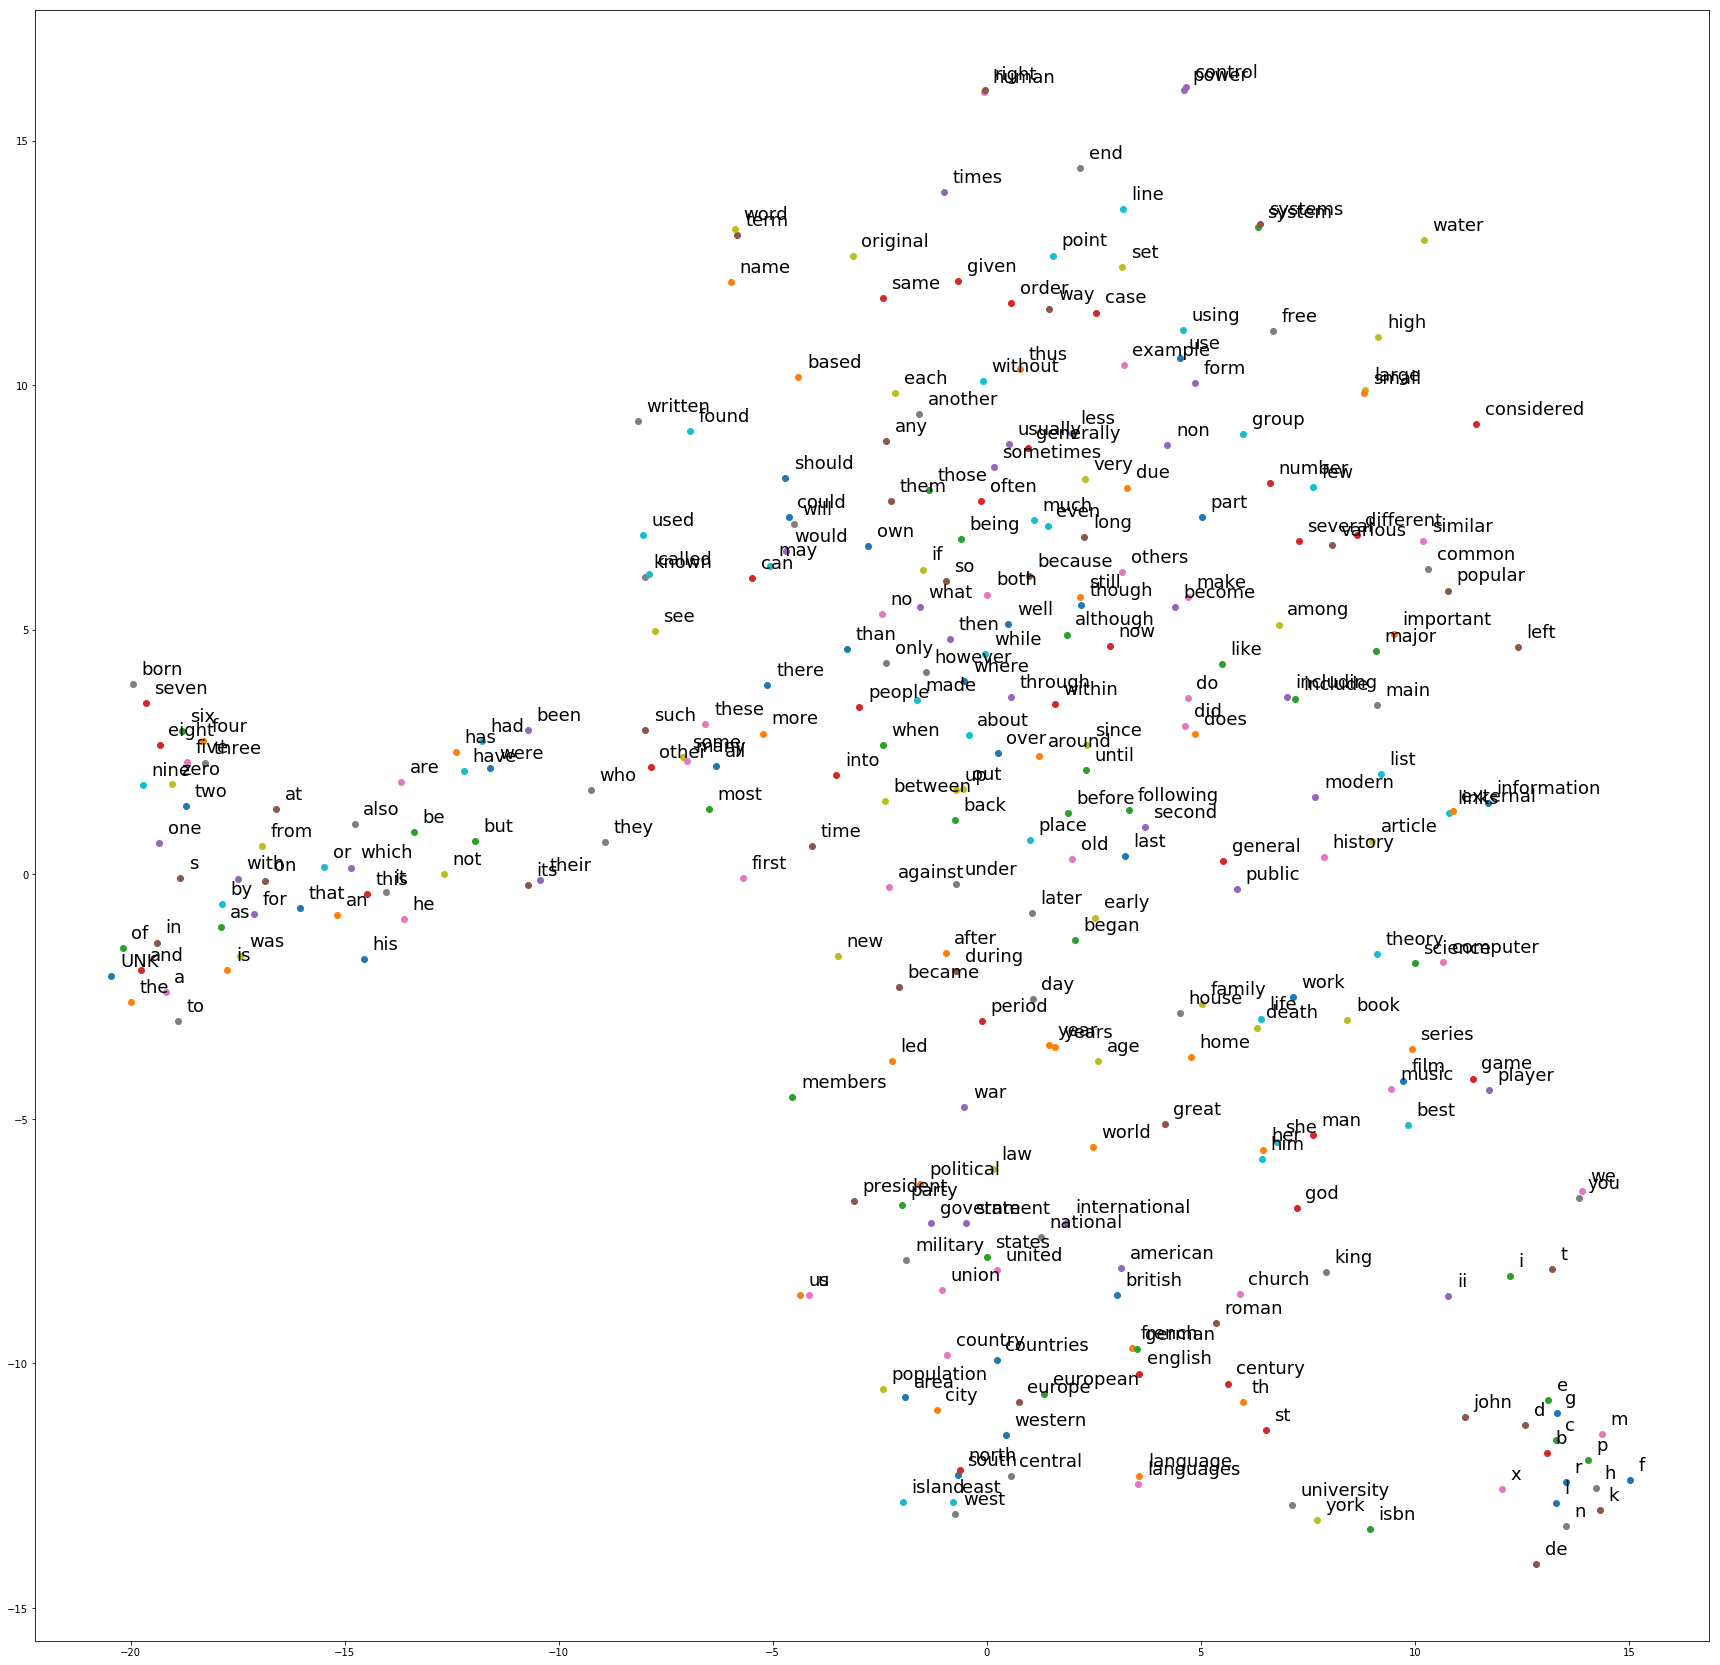

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

rng = 300

embed_matrix = sess.run(model.embed_matrix) # get the embed matrix

X_embedded = TSNE(n_components=2).fit_transform(embed_matrix[:rng])

plt.figure(figsize=(30,30))

for i in range(rng):
  plt.scatter(X_embedded[i][0], X_embedded[i][1])
  plt.text(X_embedded[i][0]+0.2,
           X_embedded[i][1]+0.2,
           index_dictionary.get(i, 0), fontsize=18)
  

plt.show()

## Assignment

Since we have already implemented Skip-Gram, the assignment for this week is to implement CBOW. Recall that CBOW actually does the reverse compared with Skip-Gram, given the sentence  

`the quick brown fox jumped over the lazy dog`  

and window size set to 1 you should generate the following training dataset,

`([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox)...`   

<img src="files/cbow_graph.png" width="350">

The basic requirements of this assignment:
1. Implement CBOW.
2. You are encouraged to try out any combinations of the hyperparameters, but window_size is always equal to 1.
3. Plot the the embeddings of the first 200 words in your dictionary using t-SNE in the notebook.
4. When you hand in the assignment, please include:
    - A `.ipynb` file containing detailed descriptions of what you have done to generate training data, the modifications you made to your model, the hyperparameters you used, and the t-SNE plot of the embeddings of the first 200 words in your dictionary.
    - Print the top-10 words with closest cosine distance of words "word", "two", "vector"
    - The python file for your model and any other files needed to run your code.

** Please name the notebook as Lab09-學號.ipynb and hand in the assignments before 11/12 23:59 ** 